In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame
from itertools import cycle, islice
from matplotlib.colors import ListedColormap
from pandas.plotting import table

In [10]:
dtypes_dict = {'advertiser_id':'category', 'action_id': np.float64, 'source_id': np.int8, \
                'country_code': np.int64, 'latitude': np.float64, 'longitude': np.float64, 'wifi_connection': bool, \
                'carrier_id': np.float16, 'os_minor': np.float32, 'os_major': np.float32, 'agent_device': np.float64, \
                'specs_brand': 'category', 'brand': np.float16, 'timeToClick': np.float64, 'touchX': np.float16, \
                'touchY': np.float16, 'ref_type': 'category', 'ref_hash': np.int64}

clicks = pd.read_csv('data/train_clicks.csv.gzip', dtype=dtypes_dict)

dtypes_dict = {'created':'str', 'application_id': 'category', 'ref_type': 'category', 'device_brand': np.float32, \
                'device_countrycode': 'category', 'device_languaje': 'category'}

installs = pd.read_csv('data/train_installs.csv.gzip', dtype=dtypes_dict)
installs.drop('click_hash', axis=1, inplace=True) # Elimino esta columna por tener todos Nan
#installs.drop('trans_id', axis=1, inplace=True) #solo 6 columnas con datos y no son revelantes
#installs['created'] = pd.to_datetime(installs['created'], format='%Y-%m-%d %H:%M:%S')

In [4]:
pd.merge(clicks, installs, on='created', how='inner')

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id_x,...,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id_y,ip_address,device_language


In [26]:
pd.merge(clicks, installs, on='trans_id', how='inner')

,advertiser_id,action_id,source_id,created_x,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,ip_address,device_language


In [11]:
g=pd.merge(clicks, installs, on='ref_hash', how='inner')
g.head()

,advertiser_id,action_id,source_id,created_x,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id_x,...,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id_y,ip_address,device_language
0,3,NaN,0,2019-03-09T01:05:04.020Z,6333597102633388268,1.205689,1.070234,False,12.0,JuPIceEiBa-Z7nAmhCDmuszkzDqFdrA,...,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,2700825596283553676,3.301378e+18
1,3,NaN,0,2019-03-11T13:16:59.223Z,6333597102633388268,1.205689,1.070234,False,4.0,_Ulg5L_2n9uhQTTilN2rY4CMEic1juc,...,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,4175259317777181190,3.301378e+18
2,3,NaN,0,2019-03-12T02:14:06.129Z,6333597102633388268,1.205689,1.070234,False,4.0,dQJ6-J13KLFI71XtFa2XEi3DHMZooB4,...,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,4175259317777181190,3.301378e+18
3,3,NaN,0,2019-03-11T13:59:56.718Z,6333597102633388268,1.205689,1.070234,False,3.0,mQJ5Le4WZlIqCK_DPT0SwGY0Q-jfZWY,...,NaN,1.990627e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,3934343467960245099,3.301378e+18
4,3,NaN,1,2019-03-10T10:29:19.742Z,6333597102633388268,1.205689,1.070234,False,10.0,_wsKmSaUcdl3PqHeSEGXz4cSW9K0ltY,...,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,8945813689569211960,3.301378e+18


In [43]:
g.isnull().sum()

advertiser_id          0
action_id             11
source_id              0
created_x              0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id             0
trans_id_x             0
os_minor               0
agent_device           5
os_major               0
specs_brand            0
brand                 11
timeToClick            2
touchX                 2
touchY                 2
ref_type_x             0
ref_hash               0
created_y              0
application_id         0
ref_type_y             0
attributed             0
implicit               0
device_countrycode     0
device_brand          11
device_model           0
session_user_agent     0
user_agent            11
event_uuid            10
kind                  10
wifi                  11
trans_id_y            11
ip_address             0
device_language        0
dtype: int64

In [44]:
#Sólo 11 dispositivos clickearon e instalaron
len(g)

11

In [3]:
#pd.merge(clicks, installs, left_on='wifi_connection', right_on='wifi', how='inner').T

In [4]:
pd.merge(clicks, installs, left_on='country_code', right_on='device_countrycode', how='inner')

,advertiser_id,action_id,source_id,created_x,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id_x,...,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id_y,ip_address,device_language


In [1]:
#pd.merge(clicks, installs, left_on='brand', right_on='device_brand', how='inner')

In [12]:
g['created_x'] = pd.to_datetime(g['created_x'], format='%Y-%m-%d %H:%M:%S')
g['created_y'] = pd.to_datetime(g['created_y'], format='%Y-%m-%d %H:%M:%S')

In [60]:
g['created_y']

0    2019-03-06 10:27:43.604
1    2019-03-08 14:10:39.335
2    2019-03-08 14:10:39.335
3    2019-03-06 03:30:01.796
4    2019-03-10 08:30:15.346
5    2019-03-08 00:30:02.714
6    2019-03-11 09:38:31.388
7    2019-03-06 21:33:40.647
8    2019-03-06 21:33:40.647
9    2019-03-06 21:33:40.647
10   2019-03-06 21:33:40.647
Name: created_y, dtype: datetime64[ns]

In [46]:
g['created_x']

0    2019-03-09 01:05:04.020000+00:00
1    2019-03-11 13:16:59.223000+00:00
2    2019-03-12 02:14:06.129000+00:00
3    2019-03-11 13:59:56.718000+00:00
4    2019-03-10 10:29:19.742000+00:00
5    2019-03-10 11:39:33.727000+00:00
6    2019-03-13 02:30:21.888000+00:00
7    2019-03-13 19:44:45.440000+00:00
8    2019-03-13 15:46:16.686000+00:00
9    2019-03-13 00:20:51.518000+00:00
10   2019-03-13 00:24:42.253000+00:00
Name: created_x, dtype: datetime64[ns, UTC]

In [13]:
y=g['created_y'].iloc[pd.DatetimeIndex(g['created_y']).day.isin({9, 10, 11, 12, 13})]

In [24]:
#vemos que las horas en las que se realizaron los clicks son posteriores a las de la instalación, por lo cual esto
#nos indica que no se realizaron clicks que terminaron en instalación por parte de un mismo dispositivo
x=g['created_x'].iloc[pd.DatetimeIndex(g['created_x']).day.isin({10, 11})]

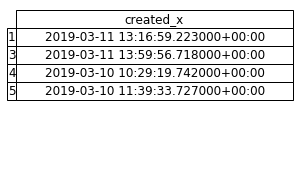

In [29]:
fig, ax = plt.subplots(figsize=(3.3, 3.3)) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  
tab = table(ax, x, loc='upper right')  
tab.auto_set_font_size(False)
tab.set_fontsize(12)
tab.scale(1.5, 1.5)
plt.savefig('/home/ailen-magali/Documentos/click&installs_createdX.png', bbox_inches = 'tight', pad_inches = 0.1)

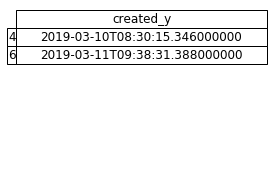

In [30]:
fig, ax = plt.subplots(figsize=(3, 3)) 
ax.xaxis.set_visible(False)  
ax.yaxis.set_visible(False)  
ax.set_frame_on(False)  
tab = table(ax, y, loc='upper right')  
tab.auto_set_font_size(False)
tab.set_fontsize(12)
tab.scale(1.5, 1.5)
plt.savefig('/home/ailen-magali/Documentos/click&installs_createdY.png', bbox_inches = 'tight', pad_inches = 0.1)